# Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Load the data**

In [2]:
wine_data = pd.read_csv("/content/winequality-red.csv")

## Exploratory Data Analysis

Peek the data

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

**Checking the missing data**

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Checking the correlation of the data**

In [6]:
correlation = wine_data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


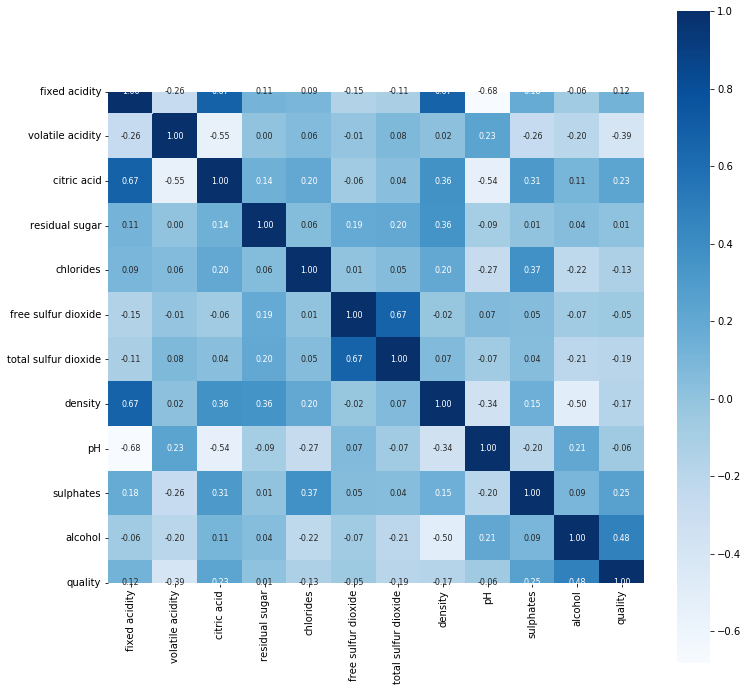

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In order of highest correlation, these variables are:
1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt in the wine
8. Fixed acidity: are non-volatile acids that do not evaporate readily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)


# **Task 1: Modelling the data**

**Partitition the data into the training and testing data**

In [8]:
X = wine_data.drop('quality',axis=1).values
y = wine_data['quality'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**1 Fitting the model using Linear Regression**

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

**Evaluating the Metrics**

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

MAE: 0.5035304415524371
MSE: 0.39002514396395477
RMSE: 0.6245199307980128
R2: 0.4031803412796221


**The Residual plot (Actual - predicted values)**

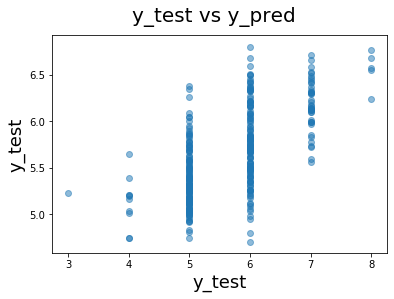

In [11]:
fig = plt.figure()
plt.scatter(y_test,y_pred,alpha=0.5)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test', fontsize = 18)
plt.show()

In [12]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']=round(df['Predictions'],2)
df.head()

,Actual,Predictions
0,6,5.35
1,5,5.06
2,6,5.66
3,5,5.46
4,6,5.73


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


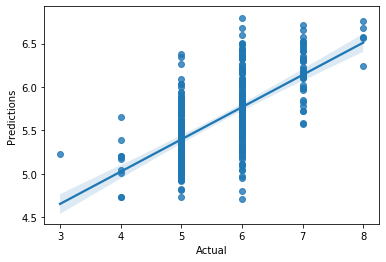

In [13]:
sns.regplot('Actual','Predictions',data=df);

**2 Fitting the model using XGBoost Regression**

In [ ]:
model_xgb = GradientBoostingRegressor()

model_xgb.fit(X_train,y_train)
y_predxg = model_xgb.predict(X_test)
y_predxg

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predxg))
print('MSE:', metrics.mean_squared_error(y_test,y_predxg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predxg)))
print('R2:', metrics.r2_score(y_test,y_predxg))

MAE: 0.4851614019302383
MSE: 0.3626861216941905
RMSE: 0.6022342747587441
R2: 0.4450147363008248


 **3 Fitting the model using RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf=RandomForestRegressor(n_estimators=1800, max_depth=20,min_samples_split = 2)

model_rf.fit(X_train,y_train)
y_predrf = model_rf.predict(X_test)
y_predrf

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_predrf))
print('MSE:', metrics.mean_squared_error(y_test,y_predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predrf)))
print('R2:', metrics.r2_score(y_test,y_predrf))

MAE: 0.42528219037329223
MSE: 0.30683974803579933
RMSE: 0.5539311762627189
R2: 0.5304713130969403


# **Task 2: Explainability of the Model**

From the metrics of the three models above, RandomForest performed well. Therefore, Random Forest model will be used in explaing the inner working of the model decisions.

**Install SHAP**

In [ ]:
pip install SHAP

In [19]:
import shap
exp = shap.Explainer(model_rf,X_test)
shap_values = exp.shap_values(X_test)

 99%|===================| 318/320 [02:54<00:01]       

In [20]:
features_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

**SHAP Feature Importance**

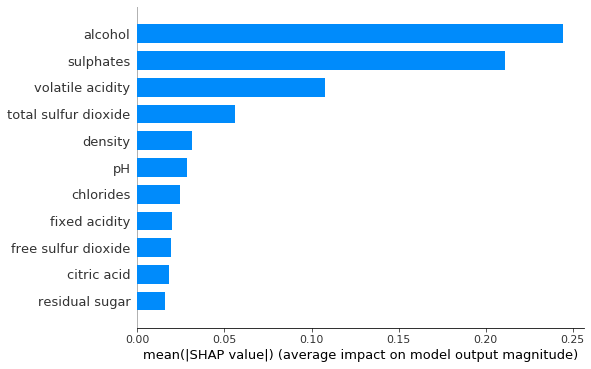

In [21]:
shap.summary_plot(shap_values,X_test,plot_type='bar',feature_names=features_names)

 **SHAP summary plot**

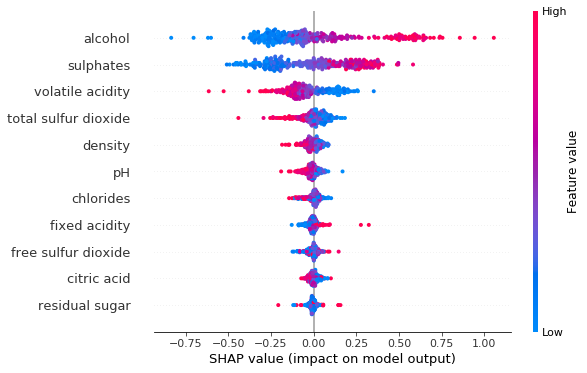

In [22]:
shap.summary_plot(shap_values,X_test,feature_names=features_names)

In [23]:
features_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

**Local Explanation**

In [24]:
#explanation of single prediction
shap.initjs()
i = 0
shap.force_plot(exp.expected_value,shap_values[i],X_test[i],feature_names=features_names)

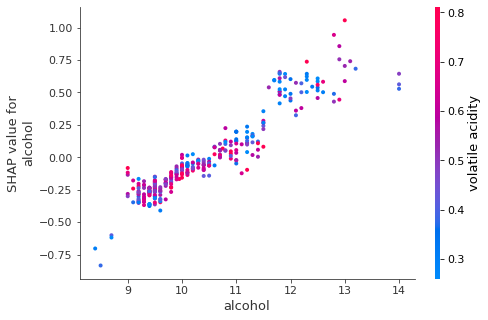

In [25]:
#SHAP Dependence plot
shap.dependence_plot(10,shap_values,X_test,feature_names=features_names)

**Partial Dependence Plot**

In [26]:
!pip install pdpbox

In [27]:
import pdpbox

In [28]:
pip install pdpbox --user

In [29]:
from pdpbox import pdp,get_dataset,info_plots

In [30]:
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf=RandomForestRegressor(n_estimators=1800, max_depth=20,min_samples_split = 2)

model_rf.fit(X_train,y_train)
y_predrf = model_rf.predict(X_test)
y_predrf

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


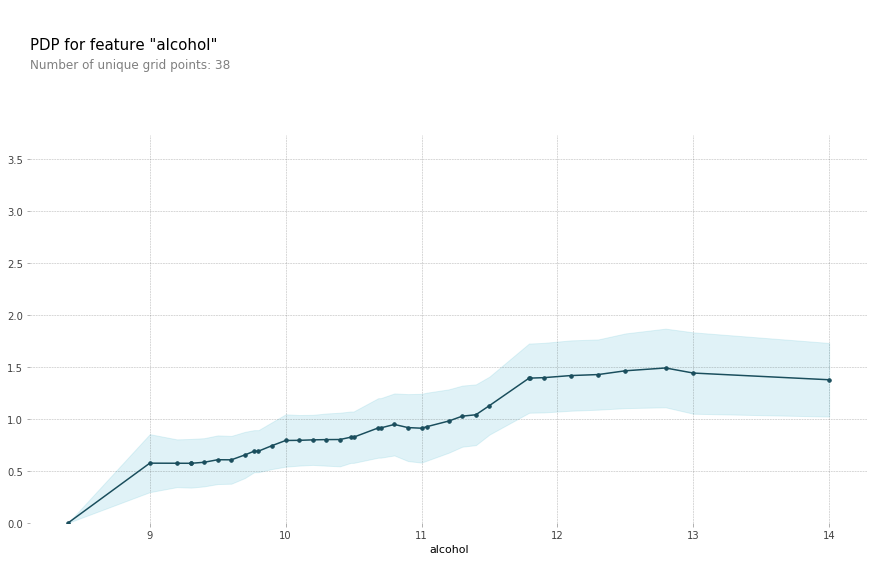

In [32]:
#Alcohol PDP plot
feature_to_plot ='alcohol'

pdp_dist = pdp.pdp_isolate (model = model_rf,dataset= X_test, feature = feature_to_plot, model_features=features_names, num_grid_points=50)

pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()

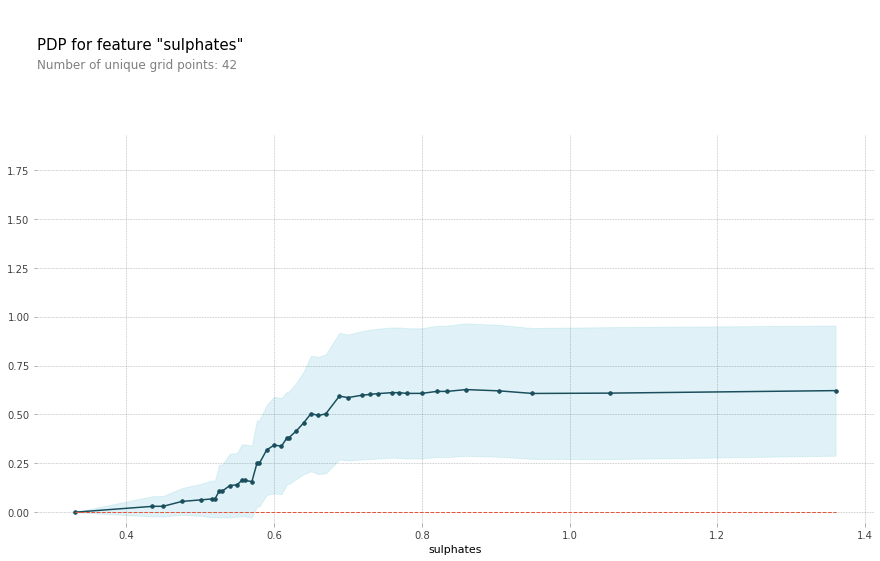

In [33]:
#Sulphates PDP plot
feature_to_plot ='sulphates'

pdp_dist = pdp.pdp_isolate (model = model_rf,dataset= X_test, feature = feature_to_plot, model_features=features_names, num_grid_points=50)

pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()

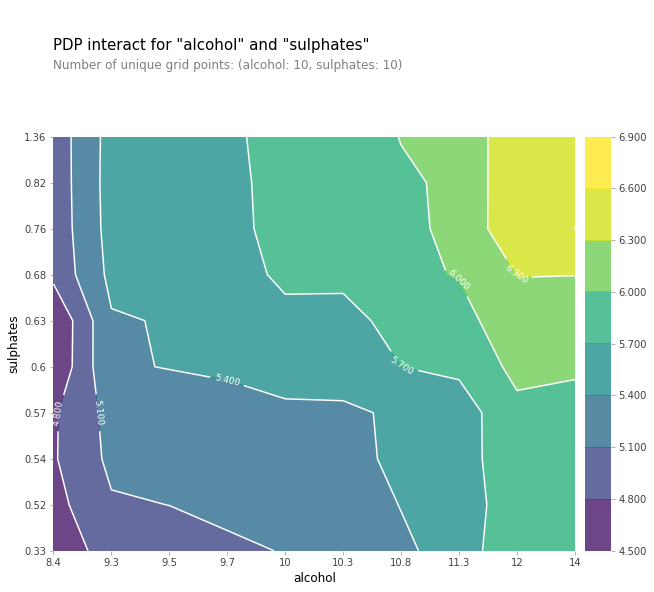

In [34]:
#features Interactions plot
pdp_age_cigadf = pdp.pdp_interact(
    model=model_rf,
    dataset=pd.concat((X_test, y_test), axis=1),
    model_features=X_test.columns, features=['alcohol','sulphates'],
    n_jobs=-1
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_age_cigadf,
    plot_type='contour', x_quantile=True,
    ncols=2, figsize=(10,10),\
    feature_names=['alcohol','sulphates']
)

 # **Task 3: Web APP Using Explainer Dashboard**

In [ ]:
pip install explainerdashboard

In [36]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard
explainer = RegressionExplainer(model_rf, X_test, y_test)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [37]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>